# Boundary Value Problem for ODE

## Shooting Method

If we want to send a rocket to the moon, what is the launch speed?
Assume the coordinate system (x, y) is centered on the earth, the rocket is launched at the earth surface ($R_{earth}=6.371e8$ ${\rm cm}$,0) with speed $v_{x}=0$, $v_{y}$. The moon is at (-3.844e10 ${\rm cm}$, 0).

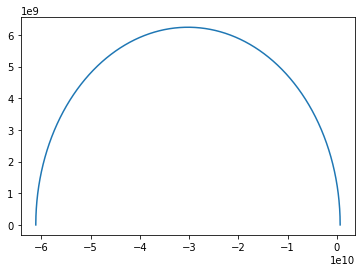

In [17]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67428e-8
M=5.974e27
day=24.*3600.
tend=20.*day
h=60.
y=[6.371e8,0.,0.,1.12e6] # we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}
t=0

vy=1.113e6 # try different vy and provide a vymin and vymax

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

y=[6.371e8,0.,0.,vy]
xp=[y[0]]
yp=[y[2]]
ta=[0]
t=0
while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,4)
        xp=np.append(xp,y[0])
        yp=np.append(yp,y[2])
        ta=np.append(ta,t)
        t = t+h
        if(y[2]<0.):
            break

plt.plot(xp,yp)

plt.show()

iter  0  shoot point, target -25379157238.921432 -38440000000.0
iter  1  shoot point, target -31107644530.020657 -38440000000.0
iter  2  shoot point, target -35042417202.1688 -38440000000.0
iter  3  shoot point, target -37401883934.49777 -38440000000.0
iter  4  shoot point, target -38703210497.58037 -38440000000.0
iter  5  shoot point, target -38041559203.34987 -38440000000.0
iter  6  shoot point, target -38369567827.19607 -38440000000.0
iter  7  shoot point, target -38535675636.06345 -38440000000.0
iter  8  shoot point, target -38452444328.76919 -38440000000.0
iter  9  shoot point, target -38410961855.03678 -38440000000.0
iter  10  shoot point, target -38431692303.192986 -38440000000.0
iter  11  shoot point, target -38442065848.29637 -38440000000.0
iter  12  shoot point, target -38436878059.06305 -38440000000.0
iter  13  shoot point, target -38439471740.86363 -38440000000.0
iter  14  shoot point, target -38440768452.28588 -38440000000.0
iter  15  shoot point, target -38440120070.3364 

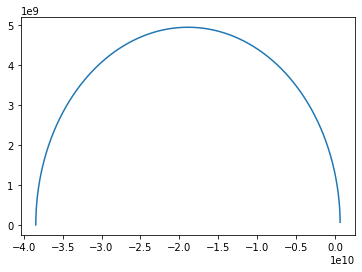

In [14]:
## Using Bisection method to get the correct launch speed

import numpy as np
import matplotlib.pyplot as plt

G=6.67428e-8
M=5.974e27
day=24.*3600.
tend=7.*day
h=60.
y=[6.371e8,0.,0.,1.12e6]
targetx=-3.844e10
t=0

xp=[]
yp=[]
ta=[]
vymin=  # input your minimal speed
vymax=   # input your maximum speed
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    ta=[]
    vy=(vymin+vymax)/2.
    y=[6.371e8,0.,0.,vy]
    t=0
    while(t<tend):
        y = rk4(t,h,y,4)
        xp=np.append(xp,y[0])
        yp=np.append(yp,y[2])
        ta=np.append(ta,t)
        if(y[2]<0):
            y[0]=y[0]-y[1]*y[2]/y[3]
            break
        t = t+h
    if(np.abs(y[0]-targetx)<1.):
        break
    if y[0]<targetx: # y[0] is where the rocket is when it crosses the x axis
         #please choose vymax=vy or vymin=vy
    else:
         #please choose vymax=vy or vymin=vy
        
    print("iter ",iter, " shoot point, target",y[0],targetx)
 
print("vy, time",vy,t)
plt.show()
plt.plot(xp,yp)
plt.show()

In [58]:
print(429660.0/3600./24.)

4.972916666666666


[637100000.0, 0.0, 0.0, 1109600.0]
error in x and y  [1.03570058e+09 1.50501185e+09]
error in x and y  [-9.12252316e+08  2.81414070e+08]
error in x and y  [11827700.30240631  1717973.78708442]
error in x and y  [-3.73081143e+04  3.88277320e+00]
error in x and y  [102.99154663  10.80876198]
error in x and y  [-0.26895142 -0.01765885]


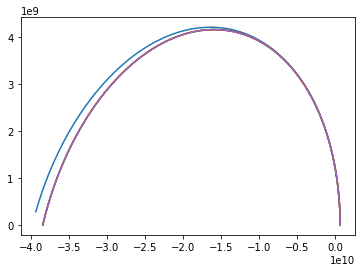

[637100000.0, -26857.013285806508, 0.0, 1109625.993054882]


In [18]:
# Now we want to get the moon in 4 days and you can vary both vx and vy
# vary both variable vx and vy
# Using Newton Raphson method

import numpy as np
import matplotlib.pyplot as plt

G=6.67428e-8
M=5.974e27
day=24.*3600.
tend=4.*day
h0=60.
targetx=-3.844e10
t=0
deri = np.zeros( (2, 2), float)
y=[6.371e8,0.,0.,1.1096e6]

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

def orbit(y):
    xp=[]
    yp=[]
    ta=[]
    t=0
    h=h0
    ytemp=y
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        ytemp = rk4(t,h,ytemp,4)
        xp=np.append(xp,ytemp[0])
        yp=np.append(yp,ytemp[2])
        ta=np.append(ta,t)
        t = t+h
    return(ytemp)

def orbitplot(y):
    xp=[y[0]]
    yp=[y[2]]
    ta=[0]
    t=0
    h=h0
    ytemp=y
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        t = t+h
        ytemp = rk4(t,h,ytemp,4)
        xp=np.append(xp,ytemp[0])
        yp=np.append(yp,ytemp[2])
        ta=np.append(ta,t)
    return([xp,yp,ta])
    
def dFi_dj(y, deri):
    [x0,vx0,y0,vy0]=orbit(y)
    [xpvx,vxpvx,ypvx,vypvx]=orbit([y[0],y[1]+1.e2,y[2],y[3]])
    [xpvy,vxpvy,ypvy,vypvy]=orbit([y[0],y[1],y[2],y[3]+1.e2])
    deri[0,0]=(xpvx-x0)/1.e2
    deri[0,1]=(xpvy-x0)/1.e2
    deri[1,0]=(ypvx-y0)/1.e2
    deri[1,1]=(ypvy-y0)/1.e2

    
itermax=15
farr=np.zeros(2,float)
dv=np.zeros(2,float)
print(y)

for iter in range(itermax):
    [farr[0],temp,farr[1],temp]=orbit(y)
    farr[0]=(farr[0]-targetx)
    farr[1]=farr[1]
    print('error in x and y ',farr)
    if(np.sqrt(farr[0]*farr[0]+farr[1]*farr[1])<100.):
        break
    dFi_dj(y, deri)
    # Please solve the linear equations dv*deriv=-farr 
    y[1]+=dv[0]
    y[3]+=dv[1]
    [xp,yp,ta]=orbitplot(y)
    plt.plot(xp,yp)

plt.show()
print(y)


### Energy of a bound necleon (Optional)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

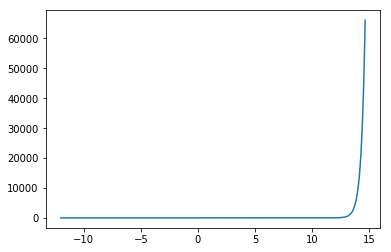

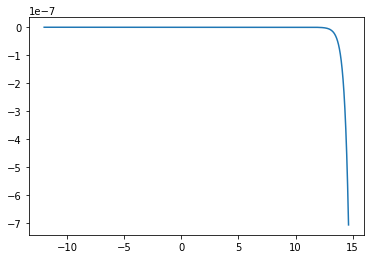

yemax yemin 933924348226.2905 -2.2338699034925193


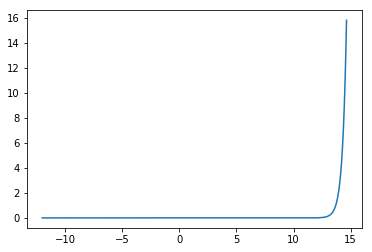

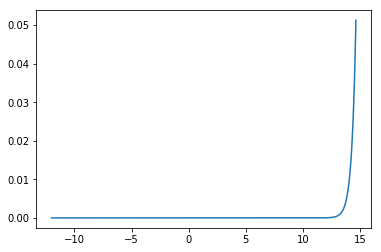

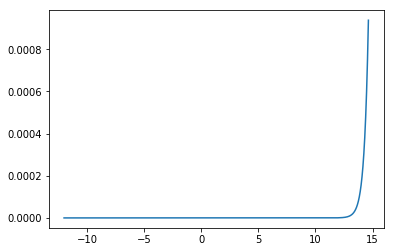

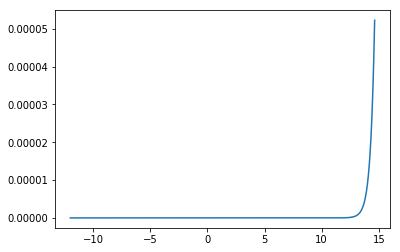

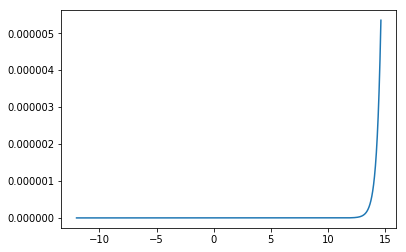

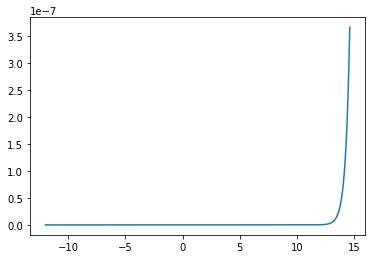

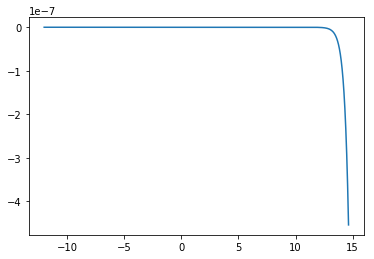

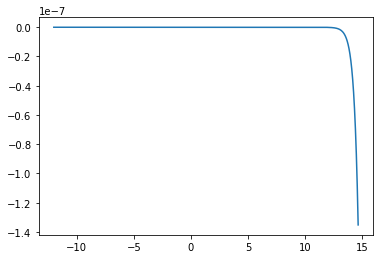

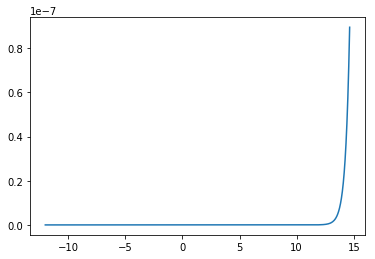

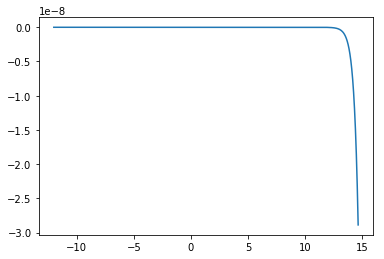

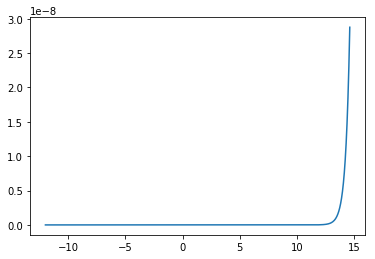

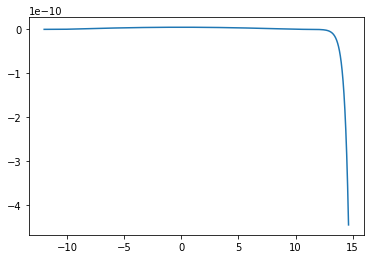

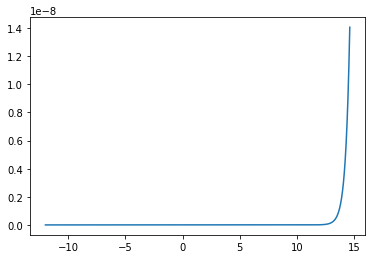

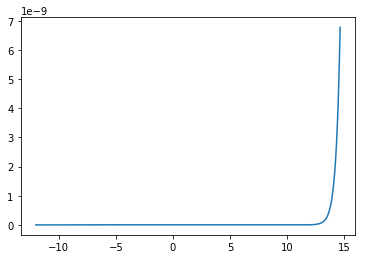

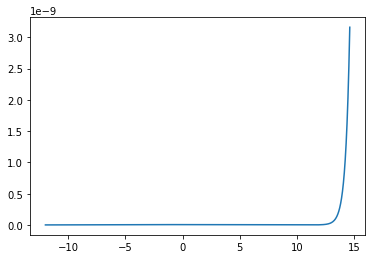

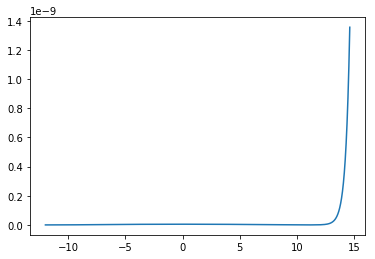

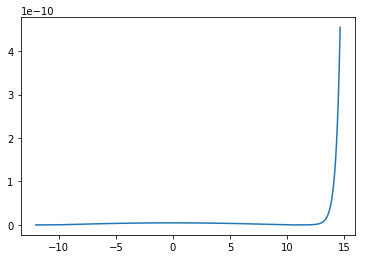

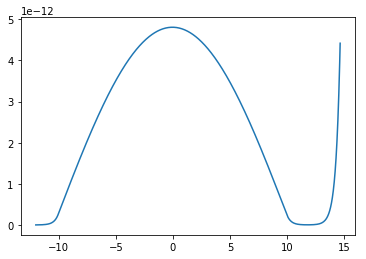

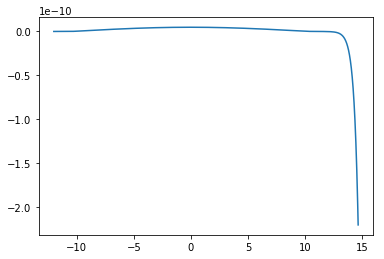

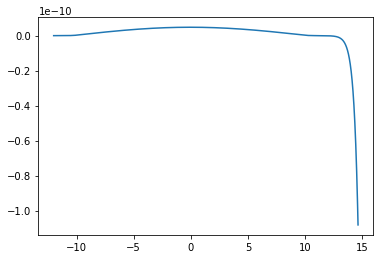

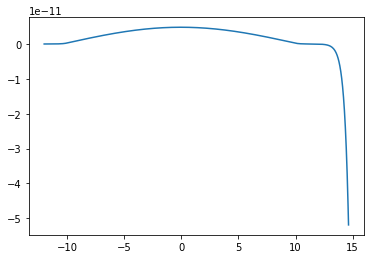

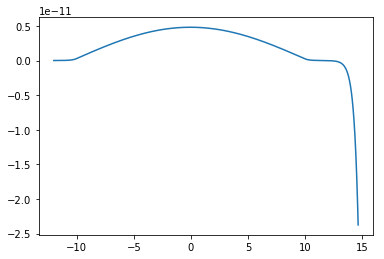

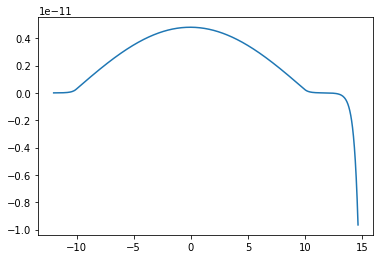

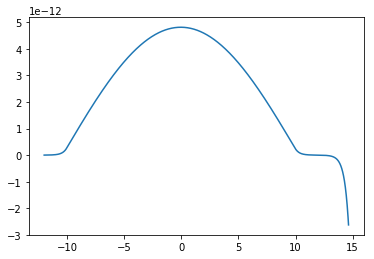

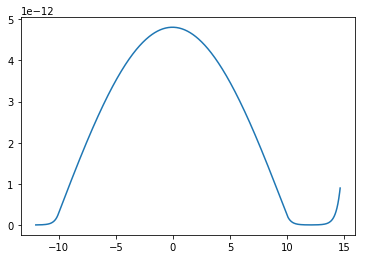

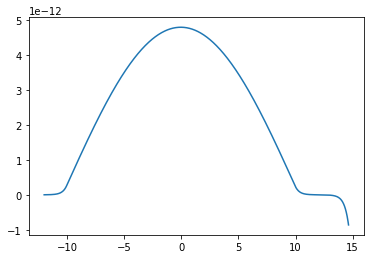

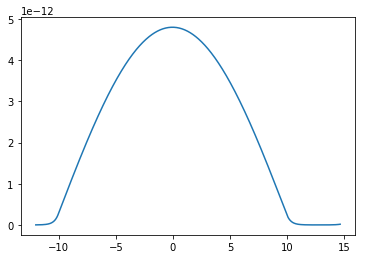

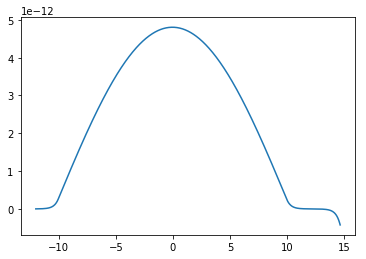

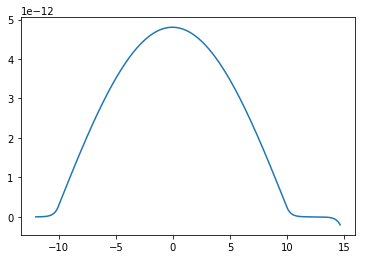

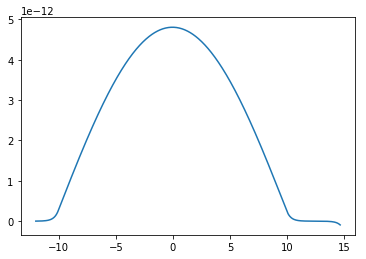

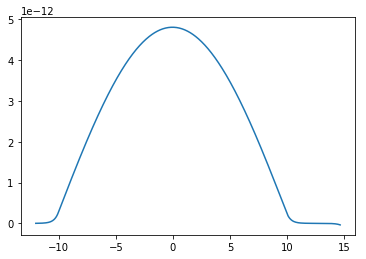

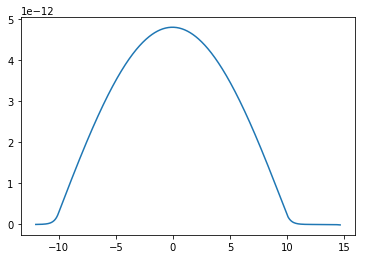

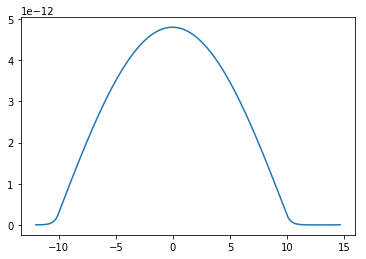

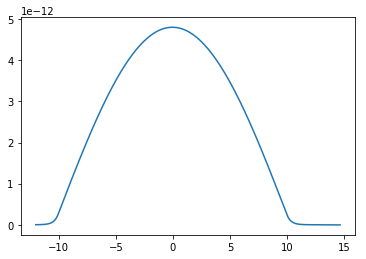

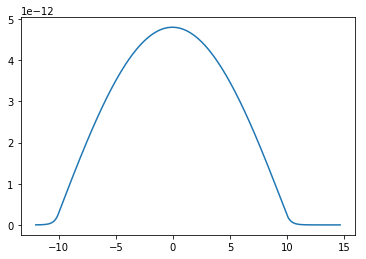

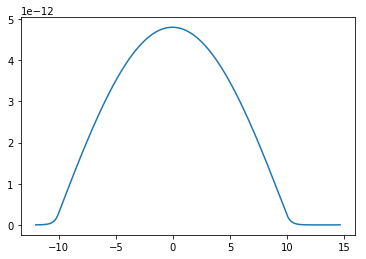

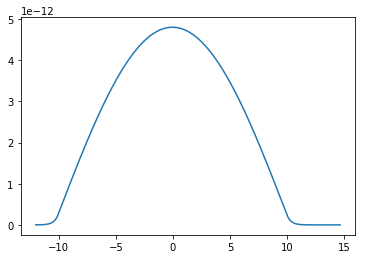

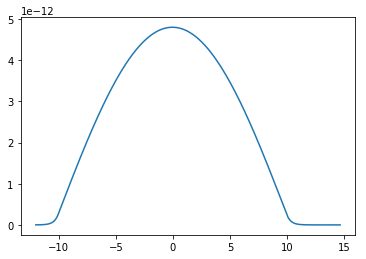

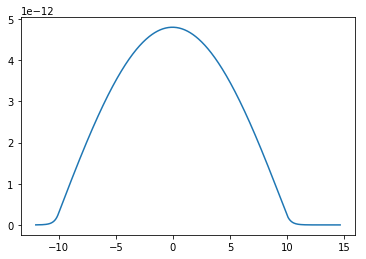

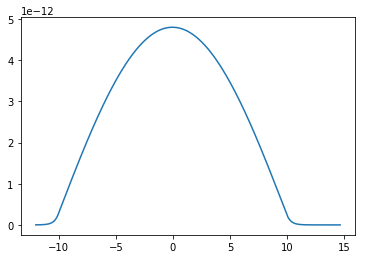

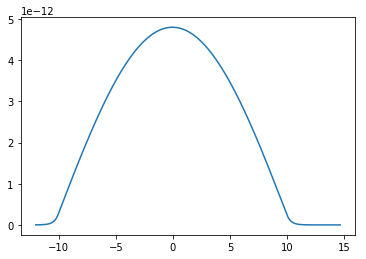

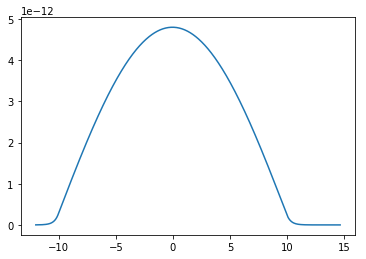

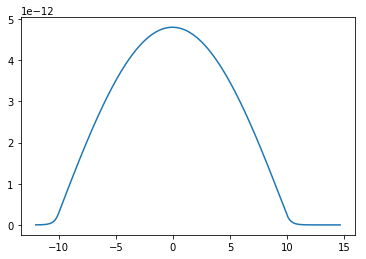

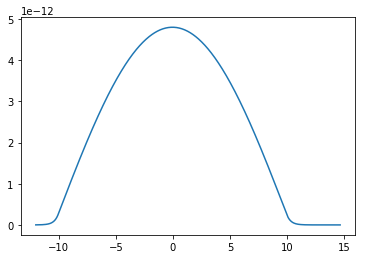

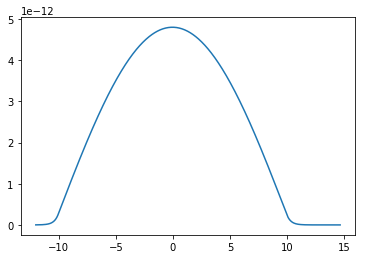

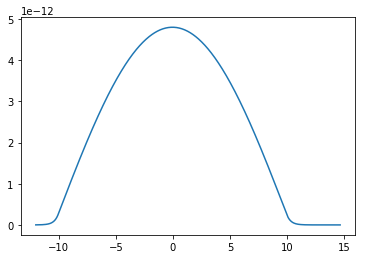

iteration  45  energy -15.952333065285401


In [6]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumEigen.py:             Finds E and psi via rk4 + bisection
 
# mass/((hbar*c)**2)= 940MeV/(197.33MeV-fm)**2 =0.4829, well width=20.0 fm
# well depth 10 MeV, Wave function not normalized.  
from numpy import *
import matplotlib.pyplot as plt
from vpython import *

eps       = 1E-3                                             # Precision
n_steps   = 801 
E         = -17.5                                              # E guess
h         = 0.04
count_max = 100
Emax      = 1.1*E                                              # E limits
Emin      = E/1.1            

def f(x, y, F,E):
    F[0] = y[1]
    F[1] = -(0.4829)*(E-V(x))*y[0]

def V(x):
    if (abs(x) < 10.):  return (-16.0)                        # Well depth
    else:               return (0.)
				
def rk4(t, y,h,Neqs,E):
    F  = zeros((Neqs),float)
    ydumb     = zeros((Neqs),float)
    k1 = zeros((Neqs),float)
    k2 = zeros((Neqs),float)
    k3 = zeros((Neqs),float)
    k4 = zeros((Neqs),float)
    f(t, y, F,E)
    for i in range(0,Neqs):
        k1[i] = h*F[i]
        ydumb[i] = y[i] + k1[i]/2.
    f(t + h/2., ydumb, F,E)
    for i in range(0,Neqs):
        k2[i] = h*F[i]
        ydumb[i] = y[i] + k2[i]/2.
    f(t + h/2., ydumb, F,E)
    for i in range(0,Neqs):
        k3[i]=  h*F[i]
        ydumb[i] = y[i] + k3[i]
    f(t + h, ydumb, F,E);
    for i in range(0,Neqs):
        k4[i]=h*F[i]
        y[i]=y[i]+(k1[i]+2*(k2[i]+k3[i])+k4[i])/6.0

        
def diff(E, h):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    y = zeros((2),float)
    nL = n_steps
    y[0] = 1.E-15;                                      # Initial left wf
    y[1] = y[0]*sqrt(-E*0.4829)    
    for ix in range(0,nL + 1):
        x = -12.+h * ix
        rk4(x, y, h, 2, E)
        x1=append(x1,x)
        y1=append(y1,y[0])
    plt.plot(x1[0:int(n_steps*5./6.)],y1[0:int(n_steps*5./6.)])
    plt.show()
    return [x1,y1]
    

[xemax,yemax]=diff(Emax,h)
[xemin,yemin]=diff(Emin,h)
print('yemax yemin',yemax[-1],yemin[-1])
for iter in range(count_max):    
    Emid=(Emax+Emin)/2.
    [xemid,yemid]=diff(Emid,h)
    if yemid[-1]*yemax[-1]>0:
        Emax=Emid
    else:
        Emin=Emid
    if abs(yemid[int(n_steps*5./6.)])<1.e-18:
        break

print('iteration ',iter,' energy',Emid)

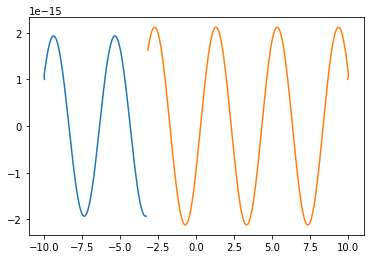

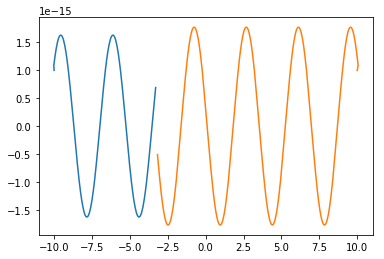

diff Emax  -1.1282092218183861 diff Emin -0.21677424366097725


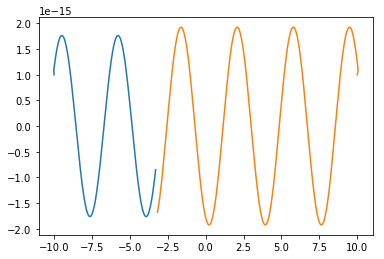

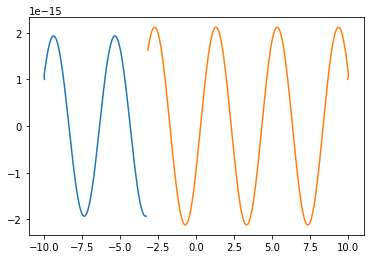

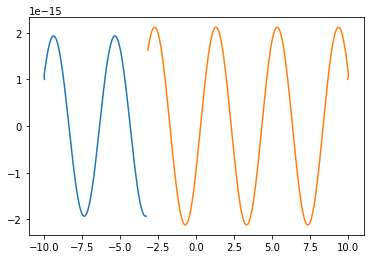

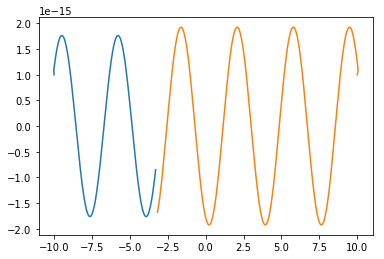

diff Emax  -1.1282092218183861 diff Emin 0.5280716910043343


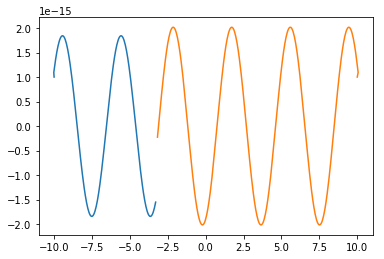

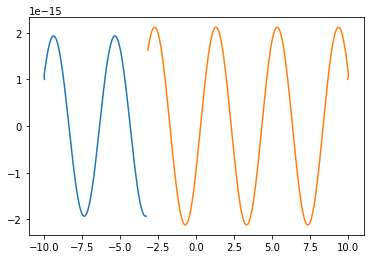

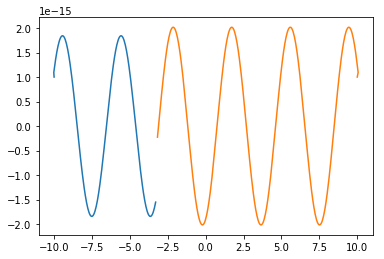

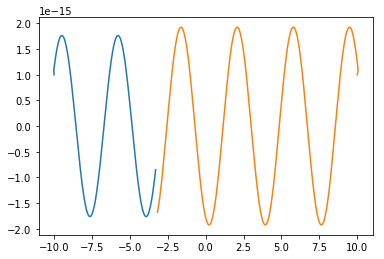

diff Emax  -0.8651052877527604 diff Emin 0.5280716910043343


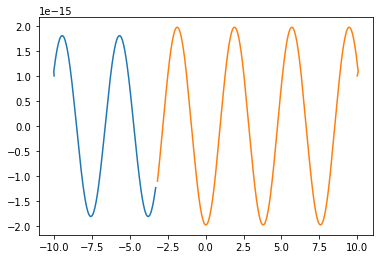

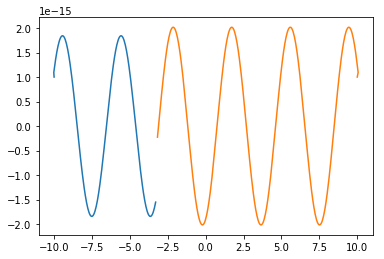

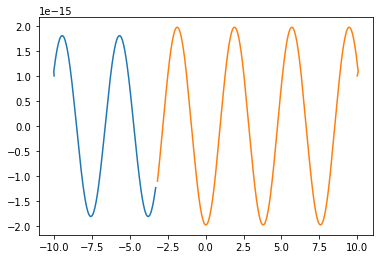

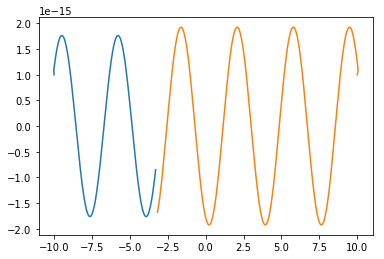

diff Emax  -0.16252208226088402 diff Emin 0.5280716910043343


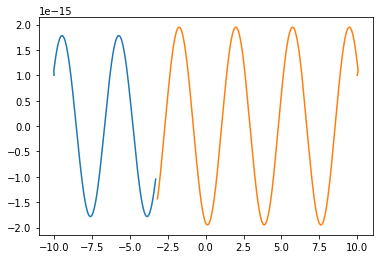

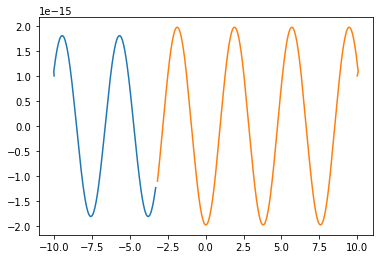

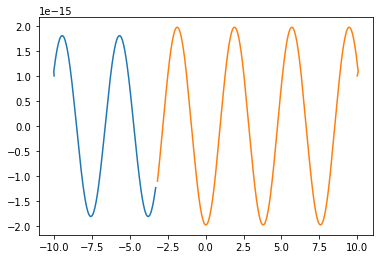

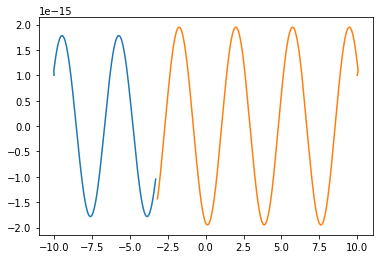

diff Emax  -0.16252208226088402 diff Emin 0.2005332913493084


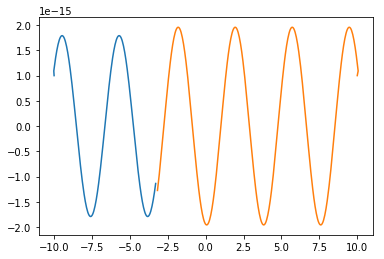

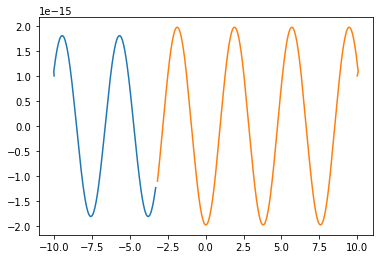

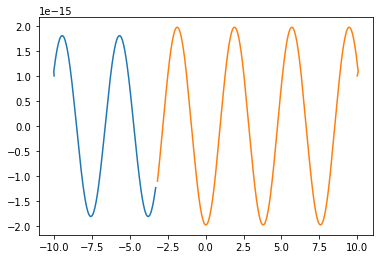

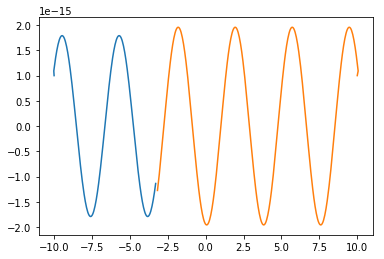

diff Emax  -0.16252208226088402 diff Emin 0.021555993225706258


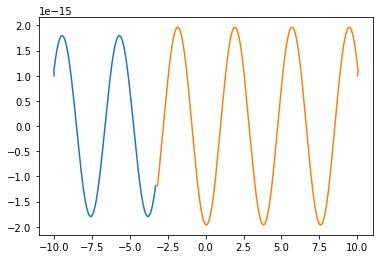

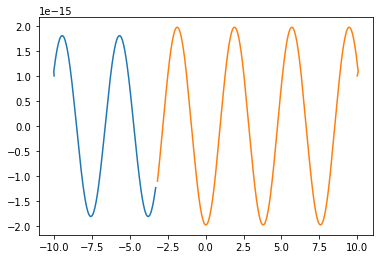

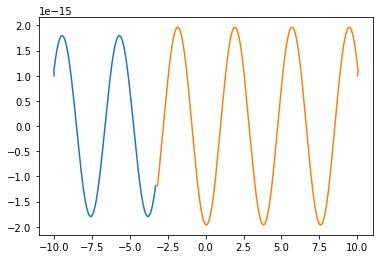

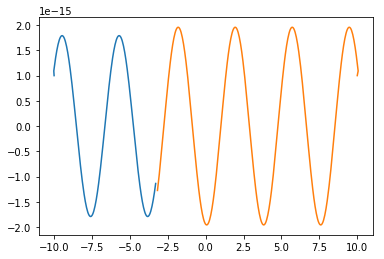

diff Emax  -0.07009592811155696 diff Emin 0.021555993225706258


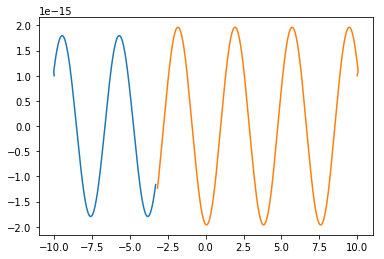

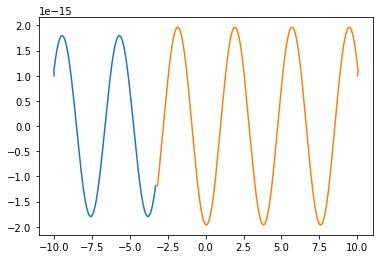

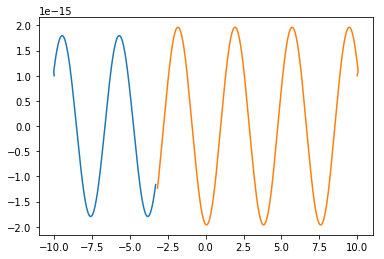

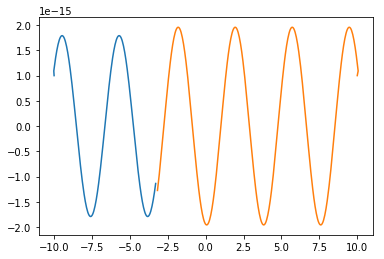

diff Emax  -0.02414129416160529 diff Emin 0.021555993225706258


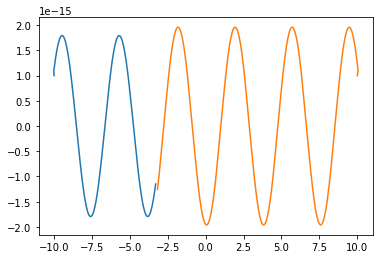

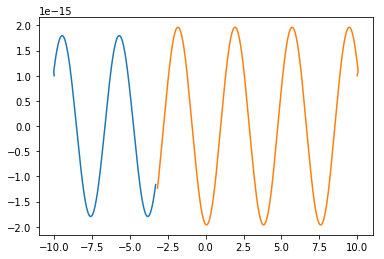

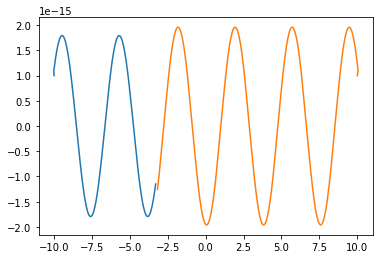

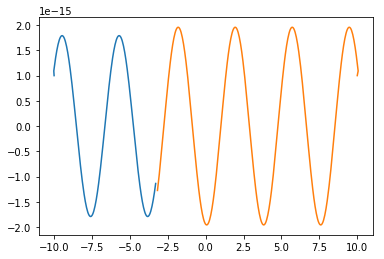

diff Emax  -0.0012565447290597588 diff Emin 0.021555993225706258


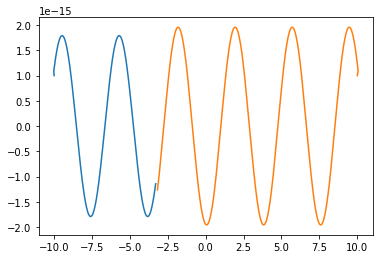

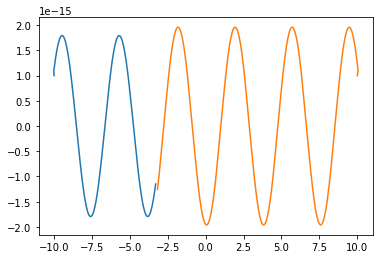

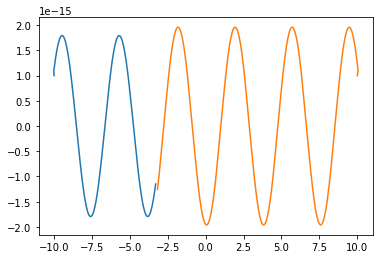

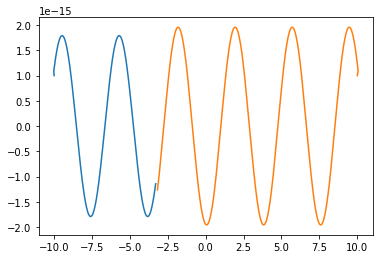

diff Emax  -0.0012565447290597588 diff Emin 0.01015923968337398


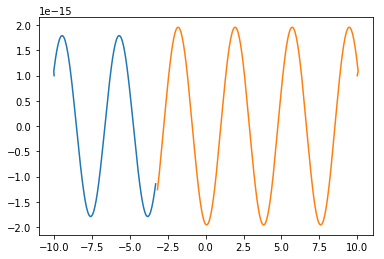

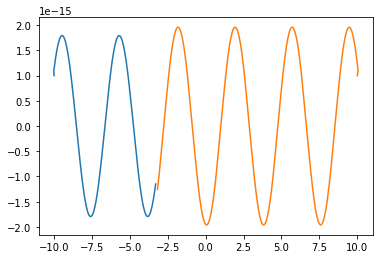

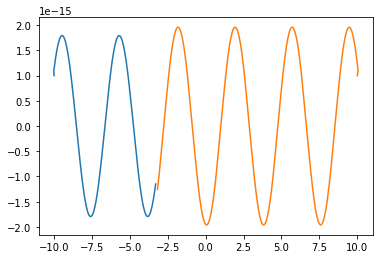

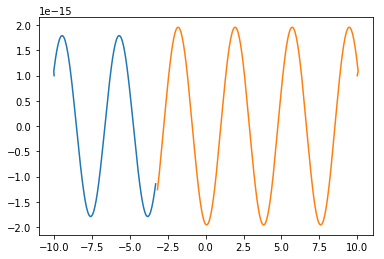

diff Emax  -0.0012565447290597588 diff Emin 0.004453665354479568


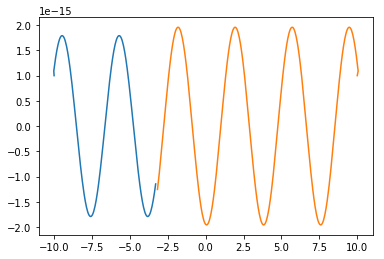

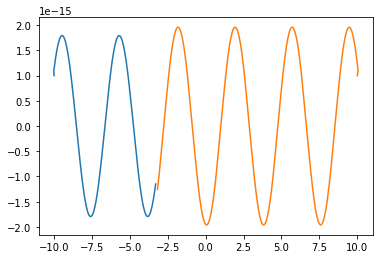

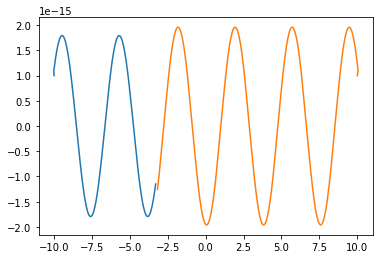

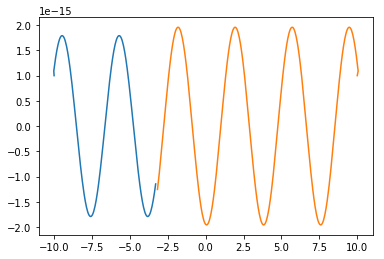

diff Emax  -0.0012565447290597588 diff Emin 0.0015991321467396407


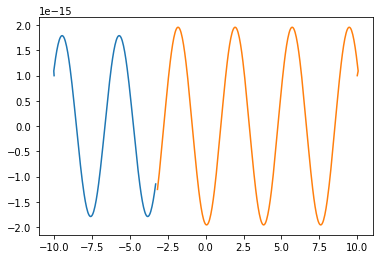

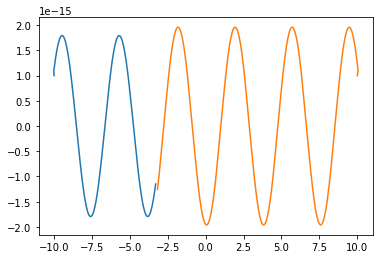

Final eigenvalue E =  -10.231423117897727
iterations, max =  11


In [9]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# QuantumEigen.py:             Finds E and psi via rk4 + bisection
 
# mass/((hbar*c)**2)= 940MeV/(197.33MeV-fm)**2 =0.4829, well width=20.0 fm
# well depth 10 MeV, Wave function not normalized.  
from numpy import *
import matplotlib.pyplot as plt
from vpython import *

eps       = 1E-3                                             # Precision
n_steps   = 501 
E         = -10.                                              # E guess
h         = 0.04
count_max = 100
Emax      = 1.1*E                                              # E limits
Emin      = E/1.1            

def f(x, y, F,E):
    F[0] = y[1]
    F[1] = -(0.4829)*(E-V(x))*y[0]

def V(x):
    if (abs(x) < 10.):  return (-16.0)                        # Well depth
    else:               return (0.)
				
def rk4(t, y,h,Neqs,E):
    F  = zeros((Neqs),float)
    ydumb     = zeros((Neqs),float)
    k1 = zeros((Neqs),float)
    k2 = zeros((Neqs),float)
    k3 = zeros((Neqs),float)
    k4 = zeros((Neqs),float)
    f(t, y, F,E)
    for i in range(0,Neqs):
        k1[i] = h*F[i]
        ydumb[i] = y[i] + k1[i]/2.
    f(t + h/2., ydumb, F,E)
    for i in range(0,Neqs):
        k2[i] = h*F[i]
        ydumb[i] = y[i] + k2[i]/2.
    f(t + h/2., ydumb, F,E)
    for i in range(0,Neqs):
        k3[i]=  h*F[i]
        ydumb[i] = y[i] + k3[i]
    f(t + h, ydumb, F,E);
    for i in range(0,Neqs):
        k4[i]=h*F[i]
        y[i]=y[i]+(k1[i]+2*(k2[i]+k3[i])+k4[i])/6.0
				
def diff(E, h):
    x1=[-10.]
    y1=[1.e-15]
    x2=[10.]
    y2=[1.e-15]
    y = zeros((2),float)
    i_match = n_steps//3                                # Matching radius
    nL = i_match + 1  
    y[0] = 1.E-15;                                      # Initial left wf
    y[1] = y[0]*sqrt(-E*0.4829)    
    for ix in range(0,nL + 1):
        x = h * (ix  -n_steps/2)
        rk4(x, y, h, 2, E)
        x1=append(x1,x)
        y1=append(y1,y[0])
    left = y[1]/y[0]                                    # Log  derivative
    y[0] = 1.E-15;                    #  slope for even;  reverse for odd
    y[1] = -y[0]*sqrt(-E*0.4829)                        # Initialize R wf
    for ix in range( n_steps,nL+1,-1):
        x = h*(ix+1-n_steps/2)
        rk4(x, y, -h, 2, E)
        x2=append(x2,x)
        y2=append(y2,y[0])
    right = y[1]/y[0] # Log derivative
    plt.clf()
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.show()
    return( (left - right)/(left + right) )
		

for count in range(0,count_max+1):                                  
    # Iteration loop
    print('diff Emax ',diff(Emax, h),'diff Emin',diff(Emin, h))
    E = (Emax + Emin)/2.                                 # Divide E range
    Diff = diff(E, h) 
    if (diff(Emax, h)*Diff > 0):  Emax = E          # Bisection algorithm
    else:                         Emin = E     
    if ( abs(Diff)  <  eps ):     break
        
print("Final eigenvalue E = ",E)
print("iterations, max = ",count)
